# Video: Monte Carlo Simulations to Estimate Option Values

Monte Carlo simulations are a flexible way to simulate expiration prices and estimate option values.

Script:
* Option contracts can be tricky financial instruments to price because their value depends on the underlying security price in the future.
* In this video, we will use a simple randomized technique called Monte Carlo simulations to estimate the value of an option given assumptions about its future price.

## How the Monte Carlo Simulation Works

For a European call option with strike price $K$,
* Sample the expiration price $S$ many times.
  * Ideally using your best time series analysis.
  * Will use a normal distribution in this example.
* For each sampled expiration price $S$,
  * Compute the sample option value $\max(S-K, 0)$.
* The expected option value is the average of the sample option values.

Script:
* I will explain how to use Monte Carlo simulations to estimate the value of a European call option.
* The basic idea is that you will sample the expiration price many many times, and each time you will calculate the final value of the option when it expires.
* Then the average of those sampled final values is your estimate for the value of the option.
* The random sampling of the expiration price is why this method is called Monte Carlo simulations.
* There's an analogy to repeatedly playing a game to figure out the expected value of gambling...
* The hard technical part is almost always the sampling part.
* How can you sample predictions for that future expiration price?
* Do you have a model for the distribution of those prices?
* Or can you forecast the time series and take the value at the expiration time?
* And if you are forecasting, is it stochastic and changing randomly each time?
* Deterministic forecasts won't work since they will predict the same price each time.
* The key requirement is random sampling of the future expiration prices with real variation.

## Simulation Assumptions

* European call option w/strike price \$12
* Expected expiration price: \$10
* Std dev of expiration price: \$5

Script:
* For this simulation, I will assume a strike price of \$12, an expected expiration price of \$10, and a standard deviation or sigma of \$5.
* I will be just using a normal distribution to focus on the Monte Carlo simulation, but making this good means making better predictions and samples of those future expiration prices.

## Option Values and Expiration Prices


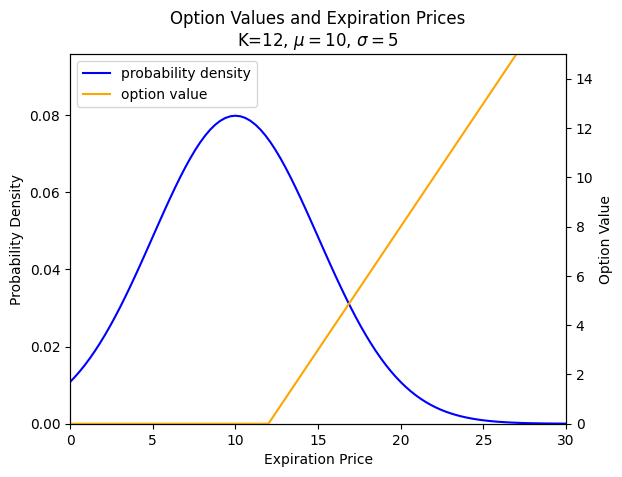

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

K = 12
S_max = 30

def plot_option_values(S_mean, S_stdev):
    np.random.seed(704)

    xs = np.linspace(0, S_max, 100)
    ps = scipy.stats.norm(loc=S_mean, scale=S_stdev).pdf(xs)

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("Expiration Price")
    ax1.set_ylabel("Probability Density")
    ax1.set_ylim(0, ps.max()*1.2)

    ax2 = ax1.twinx()
    ax2.set_xlim(0, S_max)
    ax2.set_ylabel("Option Value")
    ax2.set_ylim(0, 15)

    a1, = ax1.plot(xs, ps, color="blue", label="probability density")
    a2, = ax2.plot([0, K, S_max], [0, 0, S_max - K], label="option value", color="orange")
    plt.legend(handles=[a1, a2])
    plt.title(f"Option Values and Expiration Prices\nK={K}, $\mu={S_mean}$, $\sigma={S_stdev}$")

plot_option_values(S_mean=10, S_stdev=5)

Script:
* Here we can see the assumed probability distribution of expiration prices overlayed with the value of the option at different expiration prices.
* A generic way to calculate the expected option values would be to integrate the product of these two functions, but there generally is not a good formula for that integral, so that approach will limit the usable probability distributions.
* Monte Carlo simulations will not require us to compute that integral, or even have a nice description of the probability distribution.
* We will just need a way to sample that distribution which we can do if we have a stochastic simulation of the time series.

In [ ]:
import numpy as np

def sample_expiration_price(S_mean, S_stdev):
    # this often will be a time series prediction
    return np.random.normal(loc=S_mean, scale=S_stdev)

def sample_option_value(K, S_mean, S_stdev):
    return max(sample_expiration_price(S_mean, S_stdev) - K, 0)

def estimate_option_value(K, S_mean, S_stdev, n_samples=1000):
    np.random.seed(704)
    total = 0.0
    for i in range(n_samples):
        total += sample_option_value(K, S_mean, S_stdev)

    return total / n_samples

estimate_option_value(K=12, S_mean=10, S_stdev=5)

1.1659735608430295

Script: (screencast)
* Here's the code for the Monte Carlo simulation.
* As you can see, it is not long since we are assuming a normal distribution for the prices.
* In a real simulation, that first function, sample_expiration_price, would be much more involved.
* The real work of the Monte Carlo simulation is in estimate_option_value.
* That function just calls the sampling function many times and returns the average of the outputs.
* How does that estimate change if we change volatility?

## Increasing Option Values from Volatility


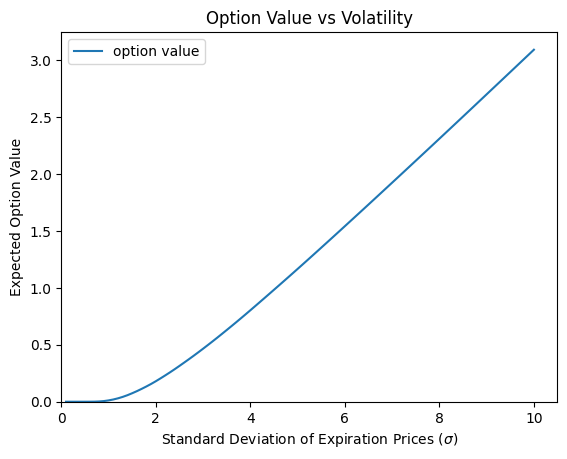

In [ ]:
sigmas = np.linspace(0.1, 10, 100)

plt.plot(sigmas, [estimate_option_value(K, S_mean=10, S_stdev=sigma) for sigma in sigmas], label="option value")

plt.legend()
plt.title("Option Value vs Volatility")
plt.xlabel("Standard Deviation of Expiration Prices ($\sigma$)")
plt.xlim(0)
plt.ylabel("Expected Option Value")
plt.ylim(0)

plt.show();

Script:
* If we plot the option value over a variety of $\sigma$ values for the volatility, we see two distinct regimes.
* Since the expected expiration price is below the strike price, we first see an almost flat range where it is very unlikely that the expiration price will meet the strike price.
* It just is too unlikely to be that far from the mean.
* For higher $\sigma$ values, it looks close to a straight line.
* Why is that?
* If we double $\sigma$, then the distances over the strike price roughly double, especially if they were far over the strike price.
* And of course, in between, there is a smooth transition as more and more of the distribution crosses the strike price.

Script: (faculty on camera)
* Estimating option values is very easy with Monte Carlo simulations if you know the expiration price distribution, or you can simulate the future prices.
* Either way, sampling future expiration prices unlocks option pricing.
* An interesting observation here is that options are more and more valuable as prices become more volatile, but that value comes in a predictable way as we just saw.
* Later on when you see Black-Scholes, you will be able to use this observation to learn what the rest of the market is thinking about a security.

https://github.com/bu-cds-omds/dx704-examples/blob/main/week02/video_monte_carlo_simulations_to_estimate_option_values.ipynb